In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
from tools import data_prep 

%matplotlib inline

In [5]:
df = data_prep()
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)
df.count()

D:\Programs\conda\lib\site-packages\IPython\core\interactiveshell.py:2903: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41432 entries, 0 to 41475
Data columns (total 31 columns):
PurchaseID                           41432 non-null int64
PurchaseTimestamp                    41432 non-null int64
PurchaseDate                         41432 non-null object
Auction                              41432 non-null object
VehYear                              41432 non-null float64
Make                                 41432 non-null object
Color                                41432 non-null object
Transmission                         41432 non-null object
WheelTypeID                          41432 non-null object
WheelType                            41380 non-null object
VehOdo                               41432 non-null float64
Nationality                          41432 non-null object
Size                                 41432 non-null object
TopThreeAmericanName                 41432 non-null object
MMRAcquisitionAuctionAveragePrice    41416 non-null object
MMRAcq

Transmission                         10730
VehOdo                               10730
MMRAcquisitionAuctionAveragePrice    10730
MMRAcquisitionAuctionCleanPrice      10730
MMRAcquisitionRetailAveragePrice     10730
MMRAcquisitonRetailCleanPrice        10730
MMRCurrentAuctionAveragePrice        10730
MMRCurrentAuctionCleanPrice          10730
MMRCurrentRetailAveragePrice         10730
MMRCurrentRetailCleanPrice           10730
MMRCurrentRetailRatio                10730
VehBCost                             10730
WarrantyCost                         10730
IsBadBuy                             10730
Auction_ADESA                        10730
Auction_MANHEIM                      10730
Auction_OTHER                        10730
VehYear_2001.0                       10730
VehYear_2002.0                       10730
VehYear_2003.0                       10730
VehYear_2004.0                       10730
VehYear_2005.0                       10730
VehYear_2006.0                       10730
VehYear_200

### Splitting the dataset 

In [14]:
# setting random state
# .as_matrix removed replaced with .values
# train test 70 / 30 percent
rs = 10
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.30, stratify=y, random_state=rs)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [16]:
X_train.shape

(7511, 126)

### Model construction and evaluation

In [4]:
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

# decision tree evaluation
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# Confusion Matrix
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# grab feature importances from the model and feature name from the original X
importances = model.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 1.0
Test accuracy: 0.7471264367816092
             precision    recall  f1-score   support

          0       0.74      0.75      0.75      1609
          1       0.75      0.74      0.75      1610

avg / total       0.75      0.75      0.75      3219



*********** Feature Importances ************

Auction_ADESA                      :0.19951016019947426
MMRCurrentAuctionAveragePrice      :0.08493098973111801
VehBCost                           :0.05688382874458479
VehOdo                             :0.054786956752776526
MMRCurrentRetailRatio              :0.037998167151660205
VNST_OK                            :0.03641251579359702
WarrantyCost                       :0.03190701258619256
MMRAcquisitionRetailAveragePrice   :0.031429901082742975
MMRCurrentRetailCleanPrice         :0.030469678836920363
MMRAcquisitionAuctionCleanPrice    :0.029402931173324005
MMRAcquisitonRetailCleanPrice      :0.028022298128793026
VNST_CO                            :0.026037261837505165
MMRC

#### Another Decition Tree model 

In [5]:
#retrain with a small max_depth limit 3
model_2 = DecisionTreeClassifier(max_depth=3, random_state=rs, )
model_2.fit(X_train, y_train)

print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))

y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.7441086406603648
Test accuracy: 0.7418452935694315
             precision    recall  f1-score   support

          0       0.70      0.84      0.76      1609
          1       0.80      0.65      0.72      1610

avg / total       0.75      0.74      0.74      3219



In [6]:
#retrain with a small max_depth limit 4
model_3 = DecisionTreeClassifier(max_depth=4, random_state=rs, criterion='entropy',)
model_3.fit(X_train, y_train)

print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

#max_depth 4.8 maximal optimum

# grab feature importances from the model and feature name from the original X
importances = model_3.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]


print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 0.7540939954733058
Test accuracy: 0.7530288909599254
             precision    recall  f1-score   support

          0       0.72      0.84      0.77      1609
          1       0.80      0.67      0.73      1610

avg / total       0.76      0.75      0.75      3219



*********** Feature Importances ************

Auction_ADESA                      :0.6393264236558694
MMRCurrentAuctionAveragePrice      :0.12713659886786932
VNST_OK                            :0.09553155133038324
VNST_CO                            :0.04485855622790786
VNST_AZ                            :0.03366041621952035
VNST_CA                            :0.030926899326011344
Auction_OTHER                      :0.028559554372438543
Make_JEEP                          :0.0
Make_MAZDA                         :0.0
Make_LINCOLN                       :0.0
Make_LEXUS                         :0.0
Make_KIA                           :0.0
VNST_WV                            :0.0
Make_MINI                          

In [7]:
# another model with params change
# retrain with a small max_depth limit 4
model_3 = DecisionTreeClassifier(max_depth=4, random_state=rs, criterion = 'gini', splitter='best'  )
model_3.fit(X_train, y_train)

print("Train accuracy:", model_3.score(X_train, y_train))
print("Test accuracy:", model_3.score(X_test, y_test))

y_pred = model_3.predict(X_test)
print(classification_report(y_test, y_pred))

#max_depth 4 maximal optimum

# grab feature importances from the model and feature name from the original X
importances = model_3.feature_importances_
feature_names = X.columns

indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]


print("\n\n***********  Feature Importances ************\n")   
for i in indices:
    print(f"{feature_names[i]:<35}:{importances[i]}")

Train accuracy: 0.7540939954733058
Test accuracy: 0.7530288909599254
             precision    recall  f1-score   support

          0       0.72      0.84      0.77      1609
          1       0.80      0.67      0.73      1610

avg / total       0.76      0.75      0.75      3219



***********  Feature Importances ************

Auction_ADESA                      :0.6038690878394325
MMRCurrentAuctionAveragePrice      :0.15369199214912177
VNST_OK                            :0.09714194151783923
VNST_CO                            :0.05480493808838575
VNST_AZ                            :0.03426193135146481
Auction_OTHER                      :0.028982800389801798
VehBCost                           :0.02724730866395407
Make_ISUZU                         :0.0
Make_INFINITI                      :0.0
Make_JEEP                          :0.0
Make_MITSUBISHI                    :0.0
Make_HYUNDAI                       :0.0
Make_KIA                           :0.0
Make_LEXUS                         

In [8]:
# visualize with graphViz
# refer to png file in your folder
dotfile = StringIO()
export_graphviz(model_3, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("model_3Tree.png") # saved in the following file - will return True if successful

Text(0,0.5,'accuracy')

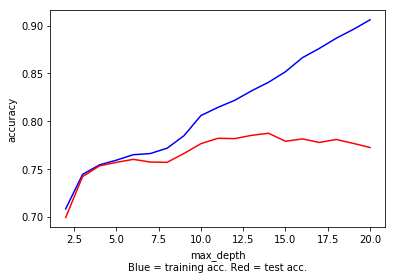

In [9]:
test_score = []
train_score = []

# check the model performance for max depth from 2-20
for max_depth in range(2, 21):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=rs)
    model.fit(X_train, y_train)
    
    test_score.append(model.score(X_test, y_test))
    train_score.append(model.score(X_train, y_train))


plt.plot(range(2, 21), train_score, 'b', range(2,21), test_score, 'r', )
plt.xlabel('max_depth\nBlue = training acc. Red = test acc.')
plt.ylabel('accuracy')



# At max_depth 5 ovefitting is  evident

#### Task 2.2 Grid Search

In [60]:
# grid search CV
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.75902010384769
Test accuracy: 0.7567567567567568
             precision    recall  f1-score   support

          0       0.72      0.84      0.77      1609
          1       0.80      0.68      0.74      1610

avg / total       0.76      0.76      0.76      3219

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 20}


In [32]:
# grid search CV #2
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 6),
          'min_samples_leaf': range(20, 35)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

# test the best model
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.7588184685976485
Test accuracy: 0.7574547390841321
             precision    recall  f1-score   support

          0       0.72      0.84      0.78      1878
          1       0.81      0.68      0.74      1878

avg / total       0.76      0.76      0.76      3756

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 20}


In [61]:
def analyse_feature_importance(dm_model, feature_names, n_to_display=20):
    # grab feature importances from the model
    importances = dm_model.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:n_to_display]

    print("\n\n*********** Feature Importances ************\n")   
    for i in indices:
        print(f"{feature_names[i]:<35}:{importances[i]}")

def visualize_decision_tree(dm_model, feature_names, save_name):
    dotfile = StringIO()
    export_graphviz(dm_model, out_file=dotfile, feature_names=feature_names)
    graph = pydot.graph_from_dot_data(dotfile.getvalue())
    graph[0].write_png(save_name) # saved in the following file

In [34]:
analyse_feature_importance(cv.best_estimator_, X.columns, 20)
visualize_decision_tree(cv.best_estimator_, X.columns, "optimal_tree.png")



*********** Feature Importances ************

Auction_ADESA                      :0.5672826439711274
MMRCurrentAuctionAveragePrice      :0.15123621308987978
VNST_OK                            :0.09070992370642476
VNST_CO                            :0.04876768331817406
VNST_AZ                            :0.031744765503795104
VNST_PA                            :0.02981892003066385
Auction_OTHER                      :0.028489778131569644
VehBCost                           :0.026015007069806598
VNST_CA                            :0.015930029591855587
VNST_TX                            :0.005290196571720035
MMRCurrentRetailRatio              :0.004714839014983362
Make_MAZDA                         :0.0
Make_LINCOLN                       :0.0
Make_KIA                           :0.0
Make_LEXUS                         :0.0
Make_MINI                          :0.0
Make_JEEP                          :0.0
Make_ISUZU                         :0.0
Make_INFINITI                      :0.0
Make_HYUNDA